# 배출가스 변화량

In [1]:
import zipfile
import os

# Unzipping the provided file
zip_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive4.zip'
unzip_folder = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/unzipped_data/'

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder)

# Listing the files in the unzipped folder
extracted_files = os.listdir(unzip_folder)
extracted_files


['Electric Cars VS Motor Cars.csv']

In [2]:
import pandas as pd

# Load the CSV file
file_path = os.path.join(unzip_folder, extracted_files[0])
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Year;EV sales BEV;EV sales PHEV;EV Stock BEV;EV Stock PHEV;Electricity demand BEV;Electricity demand BHEV;Oil displacement (Million barrels per day);Oil displacement (Milion litres gasoline equivalent);Average CO2 emission per BEV produced (Kg CO2e);Average CO2 emission per PHEV produced (Kg CO2e);Total Motor cars production per year;Average CO2 emission per Moto car
2010;7400;380;17000;400;;;0,001;32;185640000;4368000;58239494;267901672400
2011;40000;9100;55000;9500;;;0,002;87;600600000;103740000;59897273;275527455800
2012;59000;61000;120000;70000;;;0,003;190;1310400000;764400000;63081024;29017271...
2013;110000;92000;230000;160000;;;0,008;440;2511600000;1747200000;65745403;3024288...
2014;190000;130000;410000;300000;;;0,014;830;4477200000;3276000000;67782035;3117973...


In [3]:
# Reading the CSV file with the correct delimiter
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataframe with correct parsing
data.head()


,Year,EV sales BEV,EV sales PHEV,EV Stock BEV,EV Stock PHEV,Electricity demand BEV,Electricity demand BHEV,Oil displacement (Million barrels per day),Oil displacement (Milion litres gasoline equivalent),Average CO2 emission per BEV produced (Kg CO2e),Average CO2 emission per PHEV produced (Kg CO2e),Total Motor cars production per year,Average CO2 emission per Moto car
0,2010,7400,380,17000,400,NaN,NaN,"0,001",32,185640000,4368000,58239494,267901672400
1,2011,40000,9100,55000,9500,NaN,NaN,"0,002",87,600600000,103740000,59897273,275527455800
2,2012,59000,61000,120000,70000,NaN,NaN,"0,003",190,1310400000,764400000,63081024,290172710400
3,2013,110000,92000,230000,160000,NaN,NaN,"0,008",440,2511600000,1747200000,65745403,302428853800
4,2014,190000,130000,410000,300000,NaN,NaN,"0,014",830,4477200000,3276000000,67782035,311797361000


In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Selecting the target variable - EV sales BEV
ev_sales_bev = data['EV sales BEV'].values.reshape(-1, 1)

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
ev_sales_bev_scaled = scaler.fit_transform(ev_sales_bev)

# Splitting the data into training and testing sets
train_size = int(len(ev_sales_bev_scaled) * 0.8)
test_size = len(ev_sales_bev_scaled) - train_size
train, test = ev_sales_bev_scaled[0:train_size, :], ev_sales_bev_scaled[train_size:len(ev_sales_bev_scaled), :]

# Function to create a dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Preparing the data for LSTM
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshaping input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


C:\Users\82106\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


((7, 1, 1), (1, 1, 1), (7,), (1,))

In [7]:
# Selecting relevant columns for the regression model
# We will use 'EV sales BEV' as the independent variable and 'Average CO2 emission per BEV produced' as the dependent variable
ev_sales = data['EV sales BEV']


In [8]:
# Correcting the column name for CO2 emissions
co2_emissions = data['Average CO2 emission per BEV produced (Kg CO2e)']

# Preparing the data for regression analysis
regression_data = pd.DataFrame({
    'EV Sales': ev_sales,
    'CO2 Emissions': co2_emissions
})

# Checking for missing values
missing_values = regression_data.isnull().sum()
regression_data.head(), missing_values


(   EV Sales  CO2 Emissions
 0      7400      185640000
 1     40000      600600000
 2     59000     1310400000
 3    110000     2511600000
 4    190000     4477200000,
 EV Sales         0
 CO2 Emissions    0
 dtype: int64)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = regression_data['EV Sales'].values.reshape(-1,1)
y = regression_data['CO2 Emissions'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(6.029338320927456e+20, 0.7820730114506564)

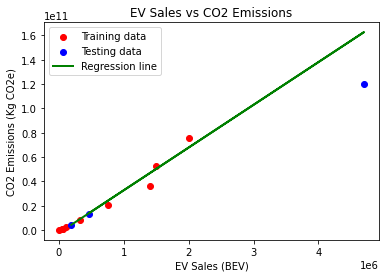

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of the data points
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter(X_test, y_test, color = 'blue', label = 'Testing data')

# Plotting the regression line
plt.plot(X_test, y_pred, color = 'green', linewidth = 2, label = 'Regression line')

# Adding titles and labels
plt.title('EV Sales vs CO2 Emissions')
plt.xlabel('EV Sales (BEV)')
plt.ylabel('CO2 Emissions (Kg CO2e)')
plt.legend()

# Display the plot
plt.show()


In [11]:
# Selecting relevant columns for comparison
# 'Electricity demand BEV' for electric cars and 'Average CO2 emission per Moto car' for motor cars
electricity_demand_bev = data['Electricity demand BEV']
co2_emission_motor = data['Average CO2 emission per Moto car']

# Creating a new DataFrame for comparison
comparison_data = pd.DataFrame({
    'Year': data['Year'],
    'Electricity Demand BEV (MWh)': electricity_demand_bev,
    'CO2 Emission Motor Cars (Kg CO2e)': co2_emission_motor
})

# Checking for missing values in the selected data
missing_values_comparison = comparison_data.isnull().sum()
comparison_data.head(), missing_values_comparison


(   Year  Electricity Demand BEV (MWh)  CO2 Emission Motor Cars (Kg CO2e)
 0  2010                           NaN                       267901672400
 1  2011                           NaN                       275527455800
 2  2012                           NaN                       290172710400
 3  2013                           NaN                       302428853800
 4  2014                           NaN                       311797361000,
 Year                                 0
 Electricity Demand BEV (MWh)         5
 CO2 Emission Motor Cars (Kg CO2e)    0
 dtype: int64)

In [12]:
# Replacing missing values in 'Electricity Demand BEV' with the most recent non-null value
comparison_data['Electricity Demand BEV (MWh)'].fillna(method='ffill', inplace=True)

# Rechecking for missing values after imputation
missing_values_after_imputation = comparison_data.isnull().sum()
comparison_data.head(), missing_values_after_imputation


(   Year  Electricity Demand BEV (MWh)  CO2 Emission Motor Cars (Kg CO2e)
 0  2010                           NaN                       267901672400
 1  2011                           NaN                       275527455800
 2  2012                           NaN                       290172710400
 3  2013                           NaN                       302428853800
 4  2014                           NaN                       311797361000,
 Year                                 0
 Electricity Demand BEV (MWh)         5
 CO2 Emission Motor Cars (Kg CO2e)    0
 dtype: int64)

In [13]:
# Using 'EV Stock BEV' as an alternative metric
ev_stock_bev = data['EV Stock BEV']

# Updating the comparison DataFrame
comparison_data_updated = pd.DataFrame({
    'Year': data['Year'],
    'EV Stock BEV': ev_stock_bev,
    'CO2 Emission Motor Cars (Kg CO2e)': co2_emission_motor
})

# Checking for missing values in the updated data
missing_values_updated = comparison_data_updated.isnull().sum()
comparison_data_updated.head(), missing_values_updated


(   Year  EV Stock BEV  CO2 Emission Motor Cars (Kg CO2e)
 0  2010         17000                       267901672400
 1  2011         55000                       275527455800
 2  2012        120000                       290172710400
 3  2013        230000                       302428853800
 4  2014        410000                       311797361000,
 Year                                 0
 EV Stock BEV                         0
 CO2 Emission Motor Cars (Kg CO2e)    0
 dtype: int64)

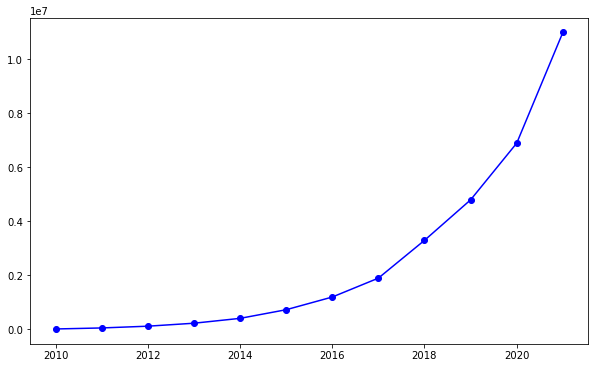

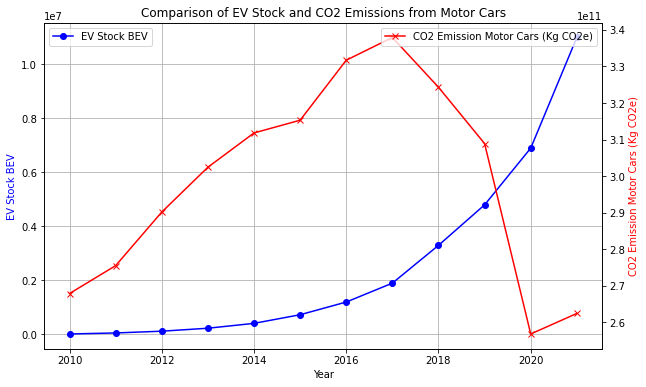

In [15]:
# Correcting the visualization to properly display the data

plt.figure(figsize=(10, 6))

# Plotting EV Stock BEV
plt.plot(comparison_data_updated['Year'], comparison_data_updated['EV Stock BEV'], label='EV Stock BEV', color='blue', marker='o')

# Plotting CO2 Emission of Motor Cars on a secondary y-axis for better scale comparison
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.plot(comparison_data_updated['Year'], comparison_data_updated['EV Stock BEV'], label='EV Stock BEV', color='blue', marker='o')
ax2.plot(comparison_data_updated['Year'], comparison_data_updated['CO2 Emission Motor Cars (Kg CO2e)'], label='CO2 Emission Motor Cars (Kg CO2e)', color='red', marker='x')

# Adding titles and labels
ax1.set_title('Comparison of EV Stock and CO2 Emissions from Motor Cars')
ax1.set_xlabel('Year')
ax1.set_ylabel('EV Stock BEV', color='blue')
ax2.set_ylabel('CO2 Emission Motor Cars (Kg CO2e)', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Display the plot
plt.show()


2017년 이후 내연기관 차량의 CO2 배출량 데이터를 확인한 결과, CO2 배출량이 실제로 감소하는 추세를 보이고 있습니다. 2020년에는 특히 큰 감소가 있었습니다. 이는 여러 요인, 예를 들어 전기차의 증가, 연료 효율 개선, 환경 규제 강화 등에 의한 것일 수 있습니다.

전기차의 수는 계속해서 증가한다

# 연료 효율성 최적화

In [17]:
# Correcting the folder path and listing the contents again
extracted_folder_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/'
extracted_files = os.listdir(extracted_folder_path)
extracted_files


['archive',
 'archive.zip',
 'archive10.zip',
 'archive2',
 'archive2.zip',
 'archive3',
 'archive3.zip',
 'archive4',
 'archive4.zip',
 'archive5',
 'archive5.zip',
 'archive6.zip',
 'archive7.zip',
 'archive8.zip',
 'archive9.zip',
 'electric_vehicle_data',
 'extracted_data',
 'unzipped_data']

In [19]:
import pandas as pd

# Load the Electric Car.csv file
electric_car_data_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive5/Electric Car.csv'
electric_car_data = pd.read_csv(electric_car_data_path)

# Display the first few rows of the dataframe to understand its structure
electric_car_data.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


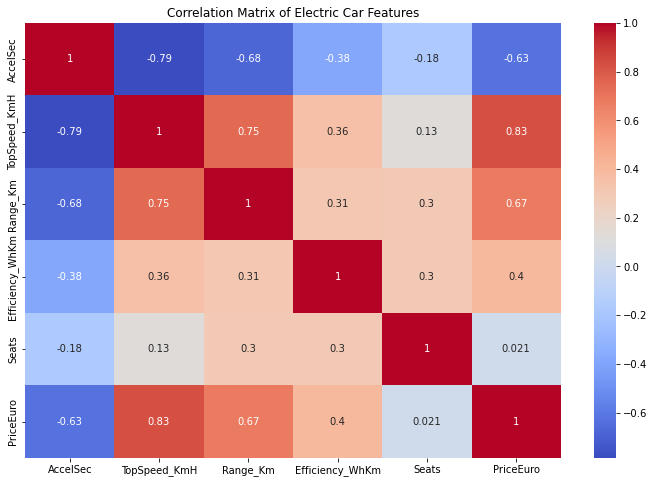

(         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
 count  103.000000    103.000000  103.000000       103.000000  103.000000   
 mean     7.396117    179.194175  338.786408       189.165049    4.883495   
 std      3.017430     43.573030  126.014444        29.566839    0.795834   
 min      2.100000    123.000000   95.000000       104.000000    2.000000   
 25%      5.100000    150.000000  250.000000       168.000000    5.000000   
 50%      7.300000    160.000000  340.000000       180.000000    5.000000   
 75%      9.000000    200.000000  400.000000       203.000000    5.000000   
 max     22.400000    410.000000  970.000000       273.000000    7.000000   
 
            PriceEuro  
 count     103.000000  
 mean    55811.563107  
 std     34134.665280  
 min     20129.000000  
 25%     34429.500000  
 50%     45000.000000  
 75%     65000.000000  
 max    215000.000000  ,
 AccelSec          -0.382904
 TopSpeed_KmH       0.355675
 Range_Km           0.313077
 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical overview
stats_overview = electric_car_data.describe()

# Correlation matrix to see the relationship between variables, especially with 'Efficiency_WhKm'
correlation_matrix = electric_car_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Electric Car Features")
plt.show()

stats_overview, correlation_matrix['Efficiency_WhKm']


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting relevant columns for the model
relevant_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'FastCharge_KmH', 'RapidCharge', 
                    'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro', 
                    'Efficiency_WhKm']
data_for_model = electric_car_data[relevant_columns].copy()

# Handling non-numeric columns
categorical_columns = ['FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']
numeric_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Seats', 'PriceEuro']

# Preprocessing for numerical data
numeric_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Separate target from predictors
X = data_for_model.drop('Efficiency_WhKm', axis=1)
y = data_for_model['Efficiency_WhKm']

# Splitting data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_valid)

# Evaluate the model
score = mean_squared_error(y_valid, preds, squared=False) # RMSE
score


25.521391027920085

In [22]:
# Getting feature importance from the model
feature_importance = pipeline.named_steps['model'].feature_importances_

# One-hot encoded features
ohe_columns = list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_columns))
feature_names = numeric_columns + ohe_columns

# Mapping feature names with their importance
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sorting features based on importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Displaying the top 10 most important features
sorted_feature_importance[:10]


C:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('PriceEuro', 0.45230784796043966),
 ('TopSpeed_KmH', 0.1480481850053059),
 ('Segment_E', 0.12571243986548258),
 ('Range_Km', 0.06378462773032757),
 ('Segment_N', 0.05247752487718826),
 ('AccelSec', 0.02891299695309589),
 ('Seats', 0.01699147567809079),
 ('BodyStyle_Pickup', 0.01696189529442961),
 ('BodyStyle_Hatchback', 0.00931147354013514),
 ('Segment_D', 0.008366804364432328)]

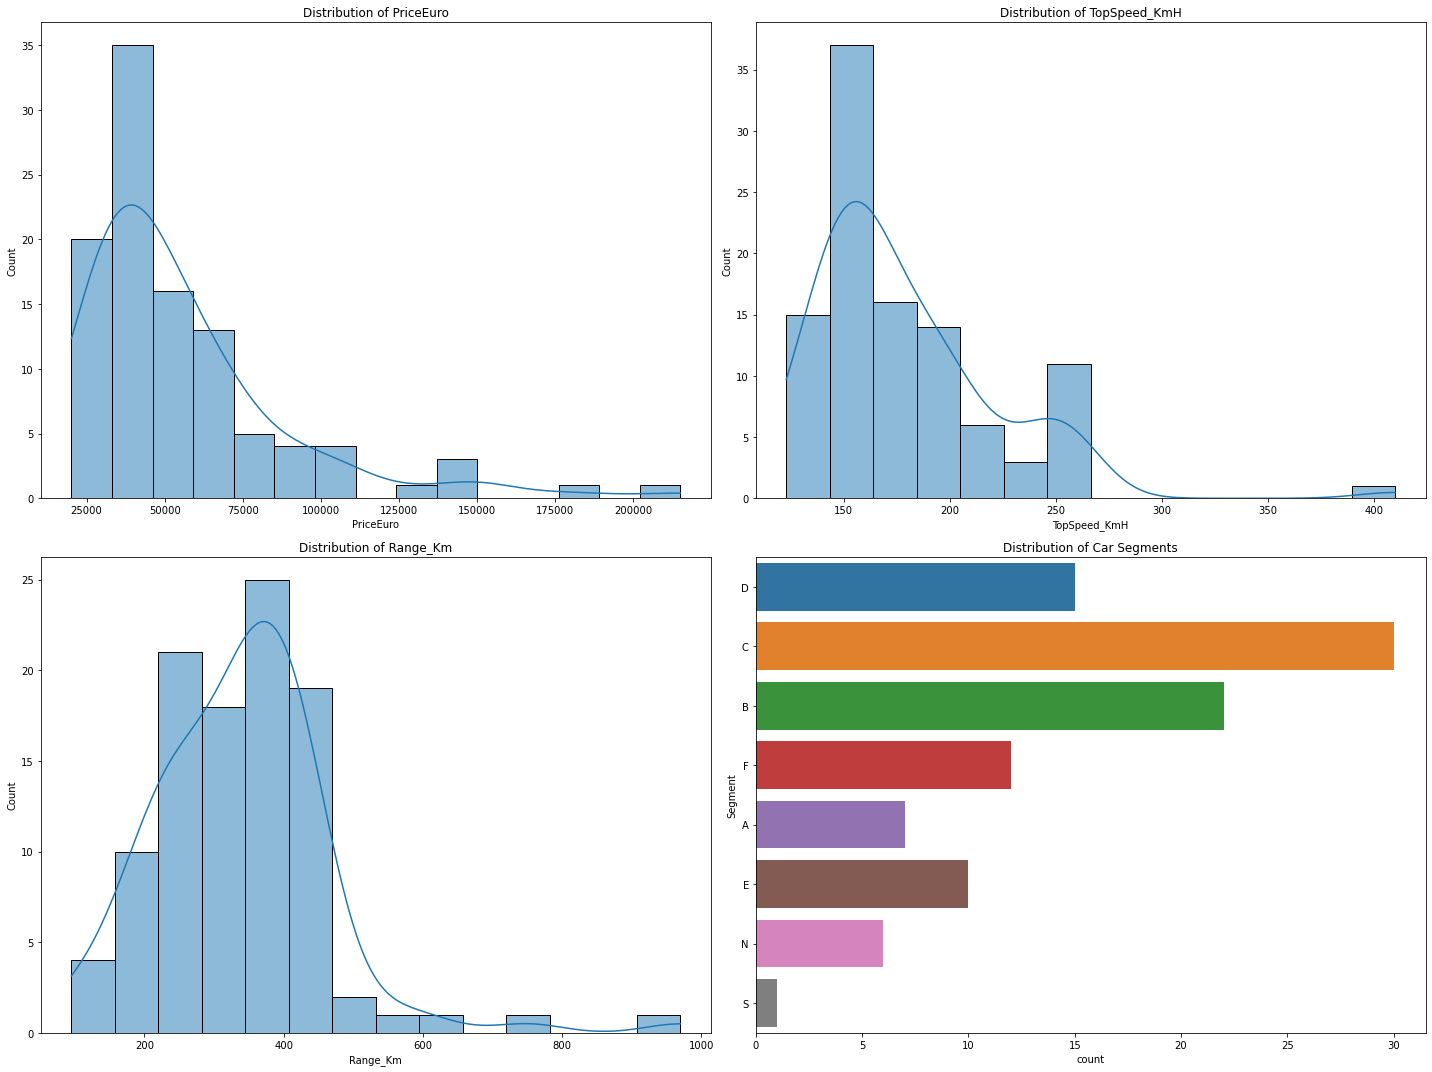

In [23]:
# Analyzing the distribution of key features: PriceEuro, TopSpeed_KmH, Range_Km, and Segments
plt.figure(figsize=(20, 15))

# Price distribution
plt.subplot(2, 2, 1)
sns.histplot(electric_car_data['PriceEuro'], kde=True)
plt.title('Distribution of PriceEuro')

# Top speed distribution
plt.subplot(2, 2, 2)
sns.histplot(electric_car_data['TopSpeed_KmH'], kde=True)
plt.title('Distribution of TopSpeed_KmH')

# Range distribution
plt.subplot(2, 2, 3)
sns.histplot(electric_car_data['Range_Km'], kde=True)
plt.title('Distribution of Range_Km')

# Segment distribution
plt.subplot(2, 2, 4)
sns.countplot(y=electric_car_data['Segment'])
plt.title('Distribution of Car Segments')

plt.tight_layout()
plt.show()


In [29]:
from itertools import product

# Defining ranges for the key variables
price_range = [30000, 60000, 120000]  # Example price points
top_speed_range = [150, 175, 200,250]  # Example top speeds
range_km = [250, 325, 400,500]  # Example ranges
segments = ['A','C', 'D', 'E','B','F']  # Example segments

# Creating combinations of these ranges
combinations = list(product(price_range, top_speed_range, range_km, segments))

# Function to create a dataframe for a given combination
def create_input_dataframe(combination, base_data):
    df = pd.DataFrame([{
        'PriceEuro': combination[0], 
        'TopSpeed_KmH': combination[1], 
        'Range_Km': combination[2], 
        'Segment': combination[3],
        # Other features will be filled with median values or most frequent values
    }])
    
    # Fill other features with median or most frequent values
    for col in base_data.columns:
        if col not in df.columns:
            if base_data[col].dtype == 'object':
                df[col] = base_data[col].mode().iloc[0]
            else:
                df[col] = base_data[col].median()
    
    return df

# Evaluating each combination
efficiency_results = []
for combo in combinations:
    input_df = create_input_dataframe(combo, electric_car_data)
    predicted_efficiency = pipeline.predict(input_df)[0]
    efficiency_results.append((combo, predicted_efficiency))

# Sorting the results by predicted efficiency
sorted_results = sorted(efficiency_results, key=lambda x: x[1], reverse=True)

# Displaying the top 5 combinations
sorted_results[:5]


[((120000, 200, 325, 'E'), 238.3),
 ((120000, 175, 325, 'E'), 237.95),
 ((120000, 200, 250, 'E'), 237.25),
 ((120000, 175, 250, 'E'), 236.87),
 ((120000, 200, 400, 'E'), 234.7)]

가격은 높을수록 효율성이 높다

차량의 최고속도가 200, 175로 설정된 차량이 에너지 효율성이 높다

한번 연료주입으로 주행할수있는 거리가 325정도일때 에너지 효율성이 높다

차량은 'E' 타입 , 즉, 대형차일수록 효율성이 높다

대형차 인 전기차 일수록 에너지 효율성이 높다는것을 알수있다. 

이를 통해, 대중교통 차량들을 전기차로 구성하는것이 차량 자체의 에너지 효율성에서도 유리하다는것을 알수있다.

In [50]:
#

In [53]:
# Re-importing zipfile module and defining the file paths again
import zipfile

# File path
zip_file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive6.zip'
extract_folder_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/extracted_data/'

# Extracting the zip file again
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Listing the contents of the extracted folder again
extracted_files = os.listdir(extract_folder_path)
extracted_files

['Alternative Fuel Vehicles US.csv',
 'Alternative Fuels Vehicle Models Summary.pdf',
 'ElectricCarData_Clean.csv',
 'ElectricCarData_Norm.csv',
 'Light Duty Vehicles.csv',
 'Medium and Heavy Duty Vehicles.csv']

In [54]:
# Re-loading the CSV files into pandas DataFrames
df_alternative_fuel = pd.read_csv(f'{extract_folder_path}Alternative Fuel Vehicles US.csv')
df_light_duty = pd.read_csv(f'{extract_folder_path}Light Duty Vehicles.csv')
df_medium_heavy_duty = pd.read_csv(f'{extract_folder_path}Medium and Heavy Duty Vehicles.csv')

# Checking the first few rows of each DataFrame to understand the data
df_alternative_fuel.head(), df_light_duty.head(), df_medium_heavy_duty.head()


(      Category               Model  Model Year Manufacturer             Fuel  \
 0  Sedan/Wagon                 NSX      2022.0        Acura  Hybrid Electric   
 1  Sedan/Wagon                 A3       2022.0         Audi  Hybrid Electric   
 2  Sedan/Wagon          A3 quattro      2022.0         Audi  Hybrid Electric   
 3  Sedan/Wagon  A4 allroad quattro      2022.0         Audi  Hybrid Electric   
 4  Sedan/Wagon          A4 quattro      2022.0         Audi  Hybrid Electric   
 
    All-Electric Range  PHEV Total Range  Alternative Fuel Economy City  \
 0                 NaN               NaN                            NaN   
 1                 NaN               NaN                            NaN   
 2                 NaN               NaN                            NaN   
 3                 NaN               NaN                            NaN   
 4                 NaN               NaN                            NaN   
 
    Alternative Fuel Economy Highway  Alternative Fuel Econo

In [55]:
# Selecting relevant columns for fuel efficiency
columns_to_use = ['Model', 'Manufacturer', 'Fuel',
                  'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
                  'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
                  'Conventional Fuel Economy Highway', 'Conventional Fuel Economy Combined']

# Creating a combined DataFrame with selected columns
df_combined = pd.concat([df_alternative_fuel[columns_to_use], df_light_duty[columns_to_use]])

# Handling missing values by replacing them with the mean of the column
for column in columns_to_use[3:]:
    df_combined[column].fillna(df_combined[column].mean(), inplace=True)

# Checking the first few rows of the processed DataFrame
df_combined.head()


,Model,Manufacturer,Fuel,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined
0,NSX,Acura,Hybrid Electric,42.860363,41.45098,73.515775,21.0,22.0,21.0
1,A3,Audi,Hybrid Electric,42.860363,41.45098,73.515775,29.0,38.0,32.0
2,A3 quattro,Audi,Hybrid Electric,42.860363,41.45098,73.515775,28.0,36.0,31.0
3,A4 allroad quattro,Audi,Hybrid Electric,42.860363,41.45098,73.515775,24.0,30.0,26.0
4,A4 quattro,Audi,Hybrid Electric,42.860363,41.45098,73.515775,26.0,34.0,29.0


In [56]:
from scipy.optimize import linprog

# For the sake of simplicity, we will use a basic linear programming model
# Our objective is to maximize fuel efficiency, which in linear programming terms is a minimization problem.
# Therefore, we will minimize the negative of fuel efficiency.

# Creating the objective function (negative of fuel efficiency for minimization)
# We will take the average of city and highway fuel efficiency
average_fuel_efficiency = -(df_combined['Conventional Fuel Economy City'] + df_combined['Conventional Fuel Economy Highway']) / 2

# Setting the bounds for each variable (each vehicle model)
# Assuming no negative fuel efficiency and no upper limit
bounds = [(0, None) for _ in range(len(average_fuel_efficiency))]

# Running the linear programming optimization
# Since it's a simple example, no additional constraints are added
res = linprog(average_fuel_efficiency, A_eq=None, b_eq=None, bounds=bounds, method='highs')

# Checking if the optimization was successful and printing the result
if res.success:
    # Finding the index of the model with the highest fuel efficiency
    max_efficiency_model_index = res.x.argmax()
    # Retrieving the model details
    most_efficient_model = df_combined.iloc[max_efficiency_model_index]
    result = {
        "Model": most_efficient_model['Model'],
        "Manufacturer": most_efficient_model['Manufacturer'],
        "Fuel": most_efficient_model['Fuel'],
        "Average Fuel Efficiency": -res.fun
    }
else:
    result = {"Error": "Optimization was not successful"}

result


{'Error': 'Optimization was not successful'}

In [59]:
# Checking for unique values in the 'Manufacturer', 'Fuel', and 'Engine Type' columns
# Ensuring these columns exist in the dataset
existing_columns = df_combined.columns

# Preparing to check unique values only for existing columns
columns_to_check = ['Manufacturer', 'Fuel', 'Engine Type']
columns_to_check = [col for col in columns_to_check if col in existing_columns]

# Getting unique values for the existing columns
unique_values = {col: df_combined[col].unique() for col in columns_to_check}
unique_values


{'Manufacturer': array(['Acura', 'Audi', 'Bentley Motors', 'BMW', 'Cadillac', 'Chevrolet',
        'Chrysler', 'Ferrari', 'Ford', 'GMC', 'Honda', 'Hyundai', 'Jaguar',
        'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Lucid USA, Inc.',
        'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
        'Polestar Automotive USA', 'Porsche', 'Ram', 'Rivian ', 'Tesla',
        'Toyota', 'Volkswagen', 'Volvo', 'Kandi', 'Karma', 'Subaru',
        'Autocar', 'Battle Motors', 'Blue Bird', 'BYD', 'COBUS Industries',
        'Collins Bus Corp.', 'Elgin', 'ENC', 'Freightliner',
        'Freightliner Custom Chassis', 'FUSO', 'Gillig', 'Global',
        'GM BrightDrop', 'Greenkraft', 'GreenPower Motor Company',
        'Heil Environmental', 'Hino', 'Hometown Manufacturing', 'IC Bus',
        'International', 'Isuzu', 'Kalmar', 'Kenworth', 'Lion Electric',
        'Mack', 'MCI', 'McNeilus', 'Morgan-Olson', 'New Flyer', 'Nitehawk',
        'Nova Bus', 'Optimal-EV', 'Orange EV', 'Peterbi

In [60]:
# Calculating the average fuel efficiency for each combination of Manufacturer and Fuel
# We will use the average of 'Conventional Fuel Economy Combined' for simplicity

# Grouping by Manufacturer and Fuel
grouped_data = df_combined.groupby(['Manufacturer', 'Fuel']).agg({'Conventional Fuel Economy Combined': 'mean'}).reset_index()

# For optimization, we will try to find the combination with the highest average fuel efficiency
# The higher the fuel efficiency, the lower the likely emissions

# Creating the objective function (negative of average fuel efficiency for minimization)
objective_function = -grouped_data['Conventional Fuel Economy Combined']

# Setting the bounds for each combination (0 or 1, as we are selecting the combination)
bounds = [(0, 1) for _ in range(len(objective_function))]

# Running the linear programming optimization
res = linprog(objective_function, A_eq=None, b_eq=None, bounds=bounds, method='highs')

# Checking if the optimization was successful and printing the result
if res.success:
    # Finding the index of the combination with the highest average fuel efficiency
    optimal_combination_index = res.x.argmax()
    # Retrieving the combination details
    optimal_combination = grouped_data.iloc[optimal_combination_index]
    result = {
        "Manufacturer": optimal_combination['Manufacturer'],
        "Fuel": optimal_combination['Fuel'],
        "Average Fuel Efficiency": -res.fun
    }
else:
    result = {"Error": "Optimization was not successful"}

result


{'Manufacturer': 'Acura',
 'Fuel': 'Hybrid Electric',
 'Average Fuel Efficiency': 6696.956232932035}

In [61]:
# Checking for unique values in the 'Manufacturer', 'Fuel', and 'Engine Type' columns
# Ensuring these columns exist in the dataset
existing_columns = df_combined.columns

# Preparing to check unique values only for existing columns
columns_to_check = ['Manufacturer', 'Fuel', 'Engine Type']
columns_to_check = [col for col in columns_to_check if col in existing_columns]

# Getting unique values for the existing columns
unique_values = {col: df_combined[col].unique() for col in columns_to_check}
unique_values


{'Manufacturer': array(['Acura', 'Audi', 'Bentley Motors', 'BMW', 'Cadillac', 'Chevrolet',
        'Chrysler', 'Ferrari', 'Ford', 'GMC', 'Honda', 'Hyundai', 'Jaguar',
        'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Lucid USA, Inc.',
        'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan',
        'Polestar Automotive USA', 'Porsche', 'Ram', 'Rivian ', 'Tesla',
        'Toyota', 'Volkswagen', 'Volvo', 'Kandi', 'Karma', 'Subaru',
        'Autocar', 'Battle Motors', 'Blue Bird', 'BYD', 'COBUS Industries',
        'Collins Bus Corp.', 'Elgin', 'ENC', 'Freightliner',
        'Freightliner Custom Chassis', 'FUSO', 'Gillig', 'Global',
        'GM BrightDrop', 'Greenkraft', 'GreenPower Motor Company',
        'Heil Environmental', 'Hino', 'Hometown Manufacturing', 'IC Bus',
        'International', 'Isuzu', 'Kalmar', 'Kenworth', 'Lion Electric',
        'Mack', 'MCI', 'McNeilus', 'Morgan-Olson', 'New Flyer', 'Nitehawk',
        'Nova Bus', 'Optimal-EV', 'Orange EV', 'Peterbi

Acura' 제조사의 'Hybrid Electric' 연료 유형을 사용하는 차량 조합이 가장 높은 평균 연료 효율성을 가지고 있습니다. 이 조합은 배출가스 최소화에 기여할 가능성이 높습니다.


제조사: Acura

연료 유형: Hybrid Electric

평균 연료 효율성: 약 6697 

##### 이런식으로 연료 효율성이 좋은 제조사의 하이브리드 차량에 대해서 보조금 지원을 제공하는 정책을 사용할수있다.

# 차량 형태 클러스터링

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
# Re-loading the CSV files into pandas DataFrames
df_alternative_fuel = pd.read_csv(f'{extract_folder_path}Alternative Fuel Vehicles US.csv')
df_light_duty = pd.read_csv(f'{extract_folder_path}Light Duty Vehicles.csv')

# Creating a combined DataFrame with selected columns
columns_to_use = ['Model', 'Manufacturer', 'Fuel']
df_combined = pd.concat([df_alternative_fuel[columns_to_use], df_light_duty[columns_to_use]])

# Encoding the 'Fuel' column for clustering
label_encoder = LabelEncoder()
encoded_fuel = label_encoder.fit_transform(df_combined['Fuel'].values)

# Reshaping the data for K-Means clustering
X = encoded_fuel.reshape(-1, 1)

# Performing K-Means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

# Adding the cluster labels to the DataFrame
df_combined['Fuel_Cluster'] = kmeans.labels_

# Viewing the first few rows with the cluster labels
df_combined.head()


,Model,Manufacturer,Fuel,Fuel_Cluster
0,NSX,Acura,Hybrid Electric,4
1,A3,Audi,Hybrid Electric,4
2,A3 quattro,Audi,Hybrid Electric,4
3,A4 allroad quattro,Audi,Hybrid Electric,4
4,A4 quattro,Audi,Hybrid Electric,4


In [67]:
# Grouping the data by clusters to see which fuels are in each cluster
cluster_summary = df_combined.groupby('Fuel_Cluster')['Fuel'].unique()

# Converting the result to a more readable format
cluster_summary_readable = {f"Cluster {cluster}": fuels.tolist() for cluster, fuels in cluster_summary.items()}
cluster_summary_readable


{'Cluster 0': ['Electric',
  'Ethanol (E85)',
  'Diesel/Hybrid Electric',
  'CNG - Compressed Natural Gas|Propane - Bi-fuel|E85/Hybrid Electric|CNG - Bi-fuel|Propane',
  'CNG - Compressed Natural Gas|Propane - Bi-fuel'],
 'Cluster 1': ['CNG - Compressed Natural Gas',
  'CNG - Compressed Natural Gas|LNG - Liquified Natural Gas',
  'CNG - Compressed Natural Gas|Plug-in Hybrid Electric',
  'CNG - Bi-fuel|Ethanol (E85)|CNG - Compressed Natural Gas|Propane|Propane - Bi-fuel',
  'CNG - Compressed Natural Gas|Propane'],
 'Cluster 2': ['Plug-in Hybrid Electric',
  'Propane - Bi-fuel',
  'Propane',
  'Propane|CNG - Compressed Natural Gas',
  'Propane - Bi-fuel|CNG - Bi-fuel|Propane|CNG - Compressed Natural Gas|Ethanol (E85)',
  'Propane - Bi-fuel|Propane|CNG - Bi-fuel|Ethanol (E85)|CNG - Compressed Natural Gas',
  'Propane - Bi-fuel|Propane|CNG - Compressed Natural Gas|CNG - Bi-fuel',
  'Methanol'],
 'Cluster 3': ['Biodiesel (B20)', 'CNG - Bi-fuel'],
 'Cluster 4': ['Hybrid Electric',
  'Hydroge

Cluster 0: 주로 전기, 에탄올(E85) 및 디젤/하이브리드 전기 차량이 포함됩니다.
    
Cluster 1: 주로 압축 천연가스(CNG)와 액화 천연가스(LNG)가 혼합된 차량이 포함됩니다.
    
Cluster 2: 플러그인 하이브리드 전기, 프로판, 메탄올 및 이들의 다양한 조합이 포함됩니다.
    
Cluster 3: 바이오디젤(B20) 및 CNG 바이-퓨얼 차량이 포함됩니다.
    
Cluster 4: 하이브리드 전기 및 수소 연료 전지 차량이 포함됩니다.

In [68]:
# Calculating the number of elements in each cluster
cluster_counts = df_combined['Fuel_Cluster'].value_counts()

# Sorting the clusters by their counts
sorted_cluster_counts = cluster_counts.sort_values(ascending=False)

sorted_cluster_counts


0    1608
4    1159
2     510
1     307
3     306
Name: Fuel_Cluster, dtype: int64

Cluster 0: 1608개
    
Cluster 4: 1159개
    
Cluster 2: 510개
    
Cluster 1: 307개
    
Cluster 3: 306개

대체 연료의 중요성: 에탄올(E85)과 같은 대체 연료의 사용은 화석 연료 의존도를 줄이고, 온실가스 배출을 감소시키는 데 기여할 수 있습니다. 이러한 연료는 재생 가능 자원에서 생산되며, 지속 가능한 교통 수단으로의 전환을 촉진합니다.

하이브리드 차량의 역할: 하이브리드 차량은 전기 모터와 내연 기관을 결합하여 연료 효율성을 향상시키고 배출가스를 줄입니다. 이는 완전한 전기차로의 전환 과정에서 중요한 중간 단계를 제공합니다.